In [65]:
# include the ExactSparseInterpolations package from the local dir 
include("../src/ExactSparseInterpolations.jl");

In [66]:
using Nemo
using BenchmarkTools
using Plots
import Primes

In [69]:
function benchmark_discrete_log(dlog, Fs)
    times = Float64[]
    for F in Fs
        ord = Int(order(F) - 1)
        PF = ExactSparseInterpolations.PrecomputedField(F)
        buf = ExactSparseInterpolations.DiscreteLogBuffers(PF)
        g = ExactSparseInterpolations.randomgenerator(F)
        d = div(ord, 2)
        y = g^d
        bench = @benchmarkable $dlog($g, $y, $ord, $buf) samples=5
        push!(times, median(run(bench)).time)
    end
    times
end

benchmark_discrete_log (generic function with 1 method)

In [70]:
Fs = [
    Nemo.GF(7), Nemo.GF(11), Nemo.GF(17), Nemo.GF(31), Nemo.GF(61),
    Nemo.GF(127), Nemo.GF(257), Nemo.GF(509), Nemo.GF(1021),
    Nemo.GF(2053), Nemo.GF(4099)
]

11-element Vector{Nemo.GaloisField}:
 Galois field with characteristic 7
 Galois field with characteristic 11
 Galois field with characteristic 17
 Galois field with characteristic 31
 Galois field with characteristic 61
 Galois field with characteristic 127
 Galois field with characteristic 257
 Galois field with characteristic 509
 Galois field with characteristic 1021
 Galois field with characteristic 2053
 Galois field with characteristic 4099

In [72]:
direct_dlog = benchmark_discrete_log(ExactSparseInterpolations.direct_discrete_log, Fs)

11-element Vector{Float64}:
   100.0
   100.0
   100.0
   100.0
   400.0
   800.0
  1100.0
  2200.0
  4200.0
  8300.0
 23800.0

In [73]:
baby_giant_dlog = benchmark_discrete_log(ExactSparseInterpolations.babystep_giantstep_discrete_log, Fs)

11-element Vector{Float64}:
  300.0
  300.0
  300.0
  400.0
  400.0
 1000.0
  700.0
 1600.0
 1200.0
 1900.0
 2400.0

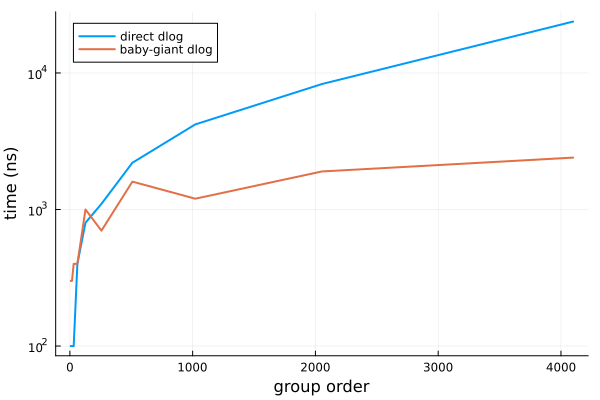

In [78]:
ns = map(Int ∘ order, Fs)
plot(ns, direct_dlog, label="direct dlog", linewidth=2, legend=:topleft, yaxis=:log)
plot!(ns, baby_giant_dlog, label="baby-giant dlog", linewidth=2)
# plot!(ns, esi_slow_gcd, label="ExactSparseInterpolations.slowgcd", linewidth=2)
xlabel!("group order")
ylabel!("time (ns)")